In [ ]:
with open("saved_model/vgg16_imagenet.json","r") as f:
    json.load()

In [3]:
import json

In [8]:
with open("saved_model/vgg16_imagenet.json", 'r') as fin:
    k = json.load(fin)

In [35]:
from pathlib import Path

In [41]:
def cut_json(path):
    path = Path(path)
    with open(path, 'r') as fin:
        k = json.load(fin)
    N = len(k['infos'])
    k1 = {'state':k['state'],
          'infos':{}}
    k1 = {'state':k['state'],
          'infos':{}}
    k1['infos'] = [val for i,val in enumerate(k['infos']) if i <= N // 1.5]
    k2['infos'] = [val for i,val in enumerate(k['infos']) if i > N // 1.5]
    path1 = path.parent.joinpath(path.stem + "_1").with_suffix(".json")
    path2 = path.parent.joinpath(path.stem + "_2").with_suffix(".json")
    with open(path1, 'w') as f:
            json.dump(k1, f, indent = 2)
    with open(path2, 'w') as f:
            json.dump(k2, f, indent = 2)
    print("Cut done!")

In [42]:
cut_json("saved_model/vgg16_imagenet.json")

Cut done!


In [32]:
k1['infos'][1] == k['infos'][1]

True

In [17]:
N //2

15

In [11]:
len(k['infos'])

31

In [6]:
m = json.load("saved_model/vgg16_imagenet.json")

AttributeError: 'str' object has no attribute 'read'

In [ ]:
def split_json():
    

# Torchlurk Example

In [1]:
%load_ext autoreload
%autoreload 2

In [47]:
import sys
sys.path.insert(1,"src")
from torchlurk.Torchlurk import Lurk
from torchlurk.misc_funcs import clean_bw_imgs,sample_imagefolder,plot_hist,crop_imgs,rename_directories,check_imgs_integrity
from torchlurk.get_models import get_alex_places
from torchvision import transforms,models
import os
import pandas as pd

## ImageNet

### Preprocessing

At that stage, Download the tinyimagenet dataset on [this link](https://www.kaggle.com/ifigotin/imagenetmini-1000#n01440764_10470.JPEG) and place it in the directory data (s.t the path looks like `data/tinyimagenet/rest_of_path`

First we center-crop inplace the images to the desired shape

In [17]:
crop_imgs("./bigdata/imagenet-mini/train/")

Progression:2.30%


KeyboardInterrupt: 

Once the dataset is downloaded, we need to get rid of a few buggy bw images: 

In [142]:
clean_bw_imgs("./bigdata/imagenet-mini/train/")

You might want to work on a subset of tinyimagenet for computations reason.

In [14]:
sample_imagefolder("bigdata/imagenet-mini/train/","static/data/imagenet10classes/images",num_dir=20,img_num_per_dir=5)

Progression:95.00%
Sampling terminated.


In [14]:
check_imgs_integrity("data/imagenet-mini/train/")

Progression:100.00%
Removed images:
[]


In [3]:
infos = pd.read_csv("./bigdata/labels_imagenet.txt",sep=" ",header=None)
dic = infos.set_index(0)[1].to_dict()

In [11]:
rename_directories('./data/imagenet-mini/train',dic)

Already renamed!


### Instanciation

In [48]:
model_vgg16 = models.vgg16(pretrained=True)
# same preprocess used as vgg16
preprocess = transforms.Compose([
    transforms.CenterCrop(224), 
    transforms.ToTensor()
    ,transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [49]:
#watch out: once you chose a folder name for the computed images and a json name, the json name will point to that folder name exclusively.
lurker = Lurk(model_vgg16,
              preprocess,
              save_gen_imgs_dir='./results/vgg16_imagenet/',
              save_json_path='./saved_model/vgg16_imagenettrash.json',
              load_json_path='./saved_model/vgg16_imagenet.json',
              imgs_src_dir="./data/imagenet-mini/train/",
              side_size=224)

NameError: name 'ImageFolderWithPaths' is not defined

## Places365

### Preprocessing

Download of the images possible on http://places2.csail.mit.edu/download.html

In [13]:
sample_imagefolder("./bigdata/Places365/val/","./data/places365/images",num_dir=365,img_num_per_dir=100)

Progression:99.73%
Sampling terminated.


In [ ]:
create_labels(places_dataset.class_to_idx,"./data/places365/")

### Instanciation

In [44]:
alex_places = get_alex_places()
places_preprocess = transforms.Compose([
        transforms.Resize((256,256)),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [34]:
lurker = Lurk(alex_places
              ,places_preprocess
              ,save_gen_imgs_dir='./results/alex_places/'
              ,save_json_path='saved_model/alex_places.json'
              ,imgs_src_dir="./data/places365/images/"
              ,side_size=224)

json saving done!


## Cifar10

In [ ]:
from torchlurk.models.PyTorch_CIFAR10.cifar10_models import vgg

### Preprocessing

In [143]:
#download the big dataset
cifar_dataset = torchvision.datasets.CIFAR10("./bigdata/CIFAR10_dataset", train=True, transform=None, target_transform=None, download=True)

Files already downloaded and verified


In [144]:
# takes ~ 5min
#convert_to_jpg_dirs(cifar_dataset,"./bigdata/CIFAR10")

Progression:100.00 %


In [181]:
sample_imagefolder("./bigdata/CIFAR10/","./data/CIFAR10/images",num_dir=10,img_num_per_dir=10)

Progression:90.00%
Sampling terminated.


In [182]:
create_labels(cifar_dataset.class_to_idx,"./data/CIFAR10/labels_cifar.txt")

### Instanciation

In [183]:
preprocess_cif = transforms.Compose(
    
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
model_cif = vgg.vgg11_bn(pretrained=True)

In [24]:
lurker = Lurk(model_cif,
                  preprocess_cif,
                  save_gen_imgs_dir='./results/cifar/',
                  save_json_path='./saved_model/cifar.json',
                  imgs_src_dir="./data/CIFAR10/images/",
                  side_size=32)

NameError: name 'model_cif' is not defined

How to serve the website

## Computations

### Serving

In [67]:
lurker.serve()

 * Serving Flask app "torchlurk.app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://0.0.0.0:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [19/May/2020 15:59:02] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [19/May/2020 15:59:02] "GET /saved_model/.current.json?_=1589896742449 HTTP/1.1" 200 -
127.0.0.1 - - [19/May/2020 15:59:02] "GET /saved_model/vgg16_imagenet.json?_=1589896742450 HTTP/1.1" 200 -
127.0.0.1 - - [19/May/2020 15:59:02] "GET /saved_model/vgg16_imagenet.json?_=1589896742452 HTTP/1.1" 200 -
127.0.0.1 - - [19/May/2020 15:59:02] "GET /saved_model/vgg16_imagenet.json?_=1589896742451 HTTP/1.1" 200 -
127.0.0.1 - - [19/May/2020 15:59:02] "GET /static/data/numb.png HTTP/1.1" 404 -
127.0.0.1 - - [19/May/2020 15:59:04] "GET /data/imagenet10classes/images/wig/n04584207_18004.JPEG HTTP/1.1" 200 -
127.0.0.1 - - [19/May/2020 15:59:04] "GET /data/imagenet10classes/images/impala/n02422699_33110.JPEG HTTP/1.1" 200 -
127.0.0.1 - - [19/May/2020 15:59:04] "GET /data/imagenet10classes/images/mask/n03724870_39361.JPEG HTTP/1.1" 200 -
127.0.0.1 - - [19/May/2020 15:59:0

In [69]:
lurker.end_serve()

### Compute top Images

We compute the average/maximum activation images from the train set:

In [65]:
lurker.compute_top_imgs()

json saving done!


In [66]:
%%time
lurker.save_avgmax_imgs()

Saving top_avg_max progression 92.31 %
CPU times: user 8min 41s, sys: 8.57 s, total: 8min 49s
Wall time: 8min 50s


And plot the "most activating" classes w.r.t a metric(max or avg) for a given filter

### Compute Layer Visualizations

Possibility to compute the layer visualization:

In [19]:
lurker.compute_viz(first_n_imgs=64)

KeyboardInterrupt: 

In [18]:
lurker.compute_layer_viz(layer_indx = 26,filter_indexes=[16])

Filter 1 / 1
recent
Vis saved!
json saving done!
Visualization done!
json saving done!


adapt layer_indx in computelayerviz

### Compute Gradients

And the respective gradients w.r.t the most activating images

In [28]:
lurker.compute_grads(first_n_imgs=64)

Grads Progression:layer13/13 101.56%


In [30]:
lurker.save_to_json()

json saving done!


### Notebook Visualization

In [ ]:
%%add_to lurker
def plot_hist(self,layer_indx,filt_indx,hist_type="max",num_classes=30):
    """
    layer_indx(int): index of the layer
    filt_indx(int): index of the filter
    hist_type(str): either "max" or "avg": which hist to plot
    """
    assert(hist_type == "max" or hist_type == "avg")
    lay_info = self.model_info[layer_indx]
    assert(isinstance(lay_info['lay'],nn.Conv2d))
    filt = lay_info['filters'][filt_indx]
    obj = filt['histo_counts_max'] if hist_type == "max" else filt['histo_counts_avg']
    fig,ax = plt.subplots(1,1,figsize=(20,3))
    keys = [i for i in list(obj.keys())[::-1]][:num_classes]
    values = [i for i in list(obj.values())][:num_classes]
    ax.xaxis.set_tick_params(rotation=45)
    ax.bar(keys,values,color="#ee4c2c")
    plt.savefig("histo")

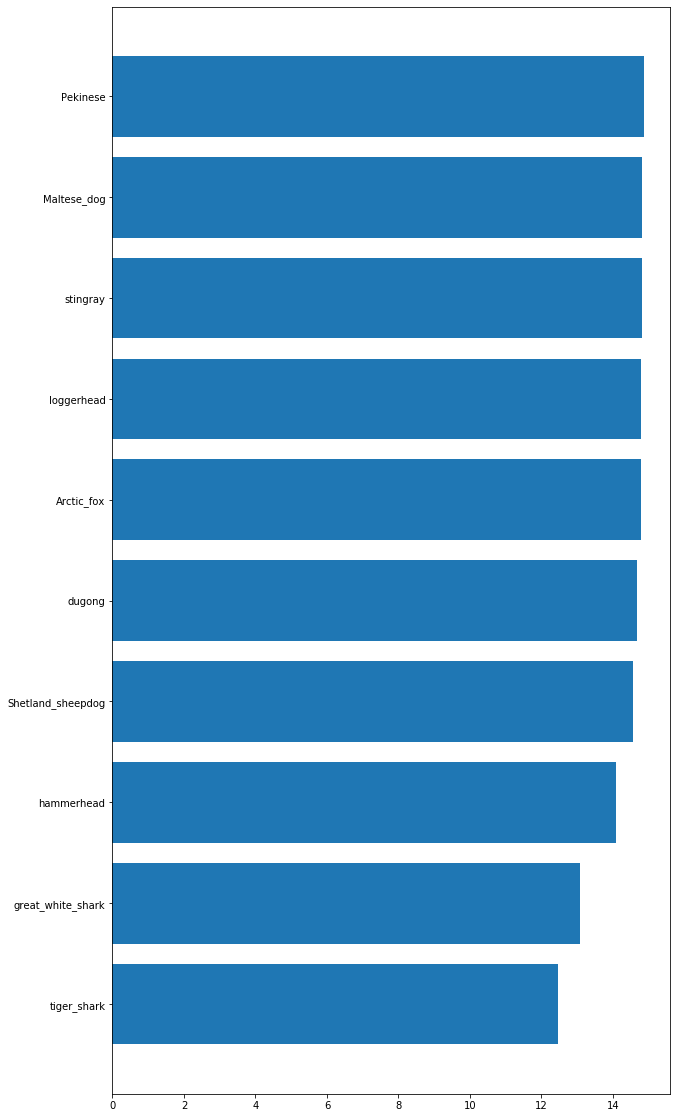

In [11]:
lurker.plot_hist(10,0,"max",num_classes=10)

In [115]:
%%add_to lurker
def plot_filter_viz(self,layer_indx,filt_indx):
    """
    plot the filter visualization
    Parameters:
    -----------
    layer_indx : int
        index of the layer
    filt_indx : int
        index of the filter
    """
    filt = self.conv_layinfos[layer_indx]['filters'][filt_indx]
    im = Image.open(filt["filter_viz"])
    plt.imshow(np.asarray(im))
    plt.axis('off')
    plt.savefig("filt_viz.png")

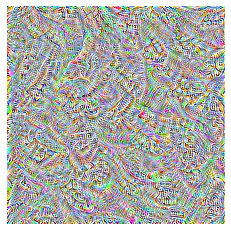

In [116]:
lurker.plot_filter_viz(12,7)

In [65]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [75]:
import jdc

In [229]:
%%add_to lurker
def plot_top(self,kind,layer_indx,filt_indx,plot_imgs=True,plot_grad=False):
    """
    plot the top activation samples of the train set for a given filter
    Parameters:
    -----------
    kind : str
        either "avg" or "max"
    layer_indx : int
        index of the layer
    filt_indx : int
        index of the filter
    add_grad : bool
        whether to plot the corresponding gradients below the original image
    """
    filt = self.conv_layinfos[layer_indx]['filters'][filt_indx]
    imgs = []
    grads = []
    if (not plot_grad and not plot_imgs):
        raise NameError("No data to display: set one of plot_grad or polt_imgs to True.")
    if plot_imgs:
        imgs = filt['{}_imgs'.format(kind)]
    if plot_grad:
        grads = filt["{}_imgs_grad".format(kind)]
    N = max(len(imgs),len(grads))
    M = 2 if sum([plot_imgs,plot_grad])== 2 else 1
    fig,axes = plt.subplots(M,N,figsize=(20,5))
    imgs = imgs + grads
    for i,(ax,img) in enumerate(zip(axes.flatten(),imgs)):
        im_pil = Image.open(img)
        ax.axis('off')
        ax.imshow(np.asarray(im_pil),interpolation='nearest')
    plt.savefig("plot_top.png")

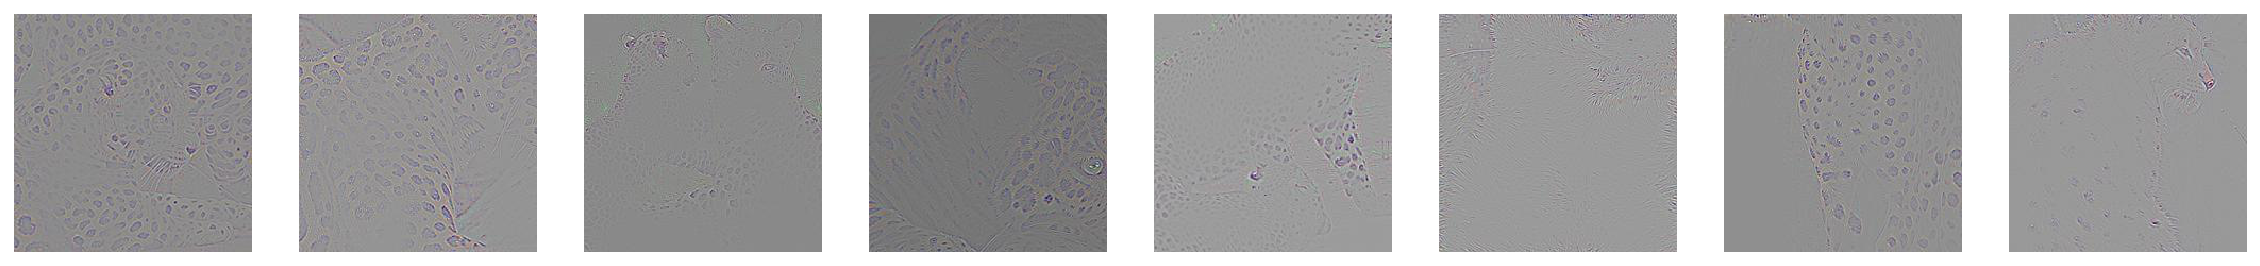

In [234]:
lurker.plot_top("avg",layer_indx=12,filt_indx=7,plot_imgs=False,plot_grad=True)

In [98]:
plt.savefig("plot_top.png")

<Figure size 432x288 with 0 Axes>

In [291]:
%%add_to lurker
def plot_crop(self,layer_indx,filt_indx,grad=False):
        """
        plot the top max images along with the cropped version which leads to the highest activating output for the given filter
        Parameters:
        -----------
        layer_indx : int
            index of the layer
        filt_indx : int
            index of the filter
        grad : bool
            whether to plot grad or the original image
        """ 
        key = "max_imgs"
        key_crop = "max_imgs_crop" 
        if grad:
            key += "_grad"
            key_crop += "_grad"
        filt = self.conv_layinfos[layer_indx]['filters'][filt_indx]
        imgs = filt[key]
        crop_imgs = filt[key_crop]
        fig,axes = plt.subplots(2,len(imgs),figsize=(20,4.5))
        for i,(ax,img) in enumerate(zip(axes.flatten(),imgs+crop_imgs)):
            ax.axis('off')
            im_pil = Image.open(img)
            ax.imshow(np.asarray(im_pil))
        plt.savefig("deconv_imgs.png")
        ################################ Serving ################################

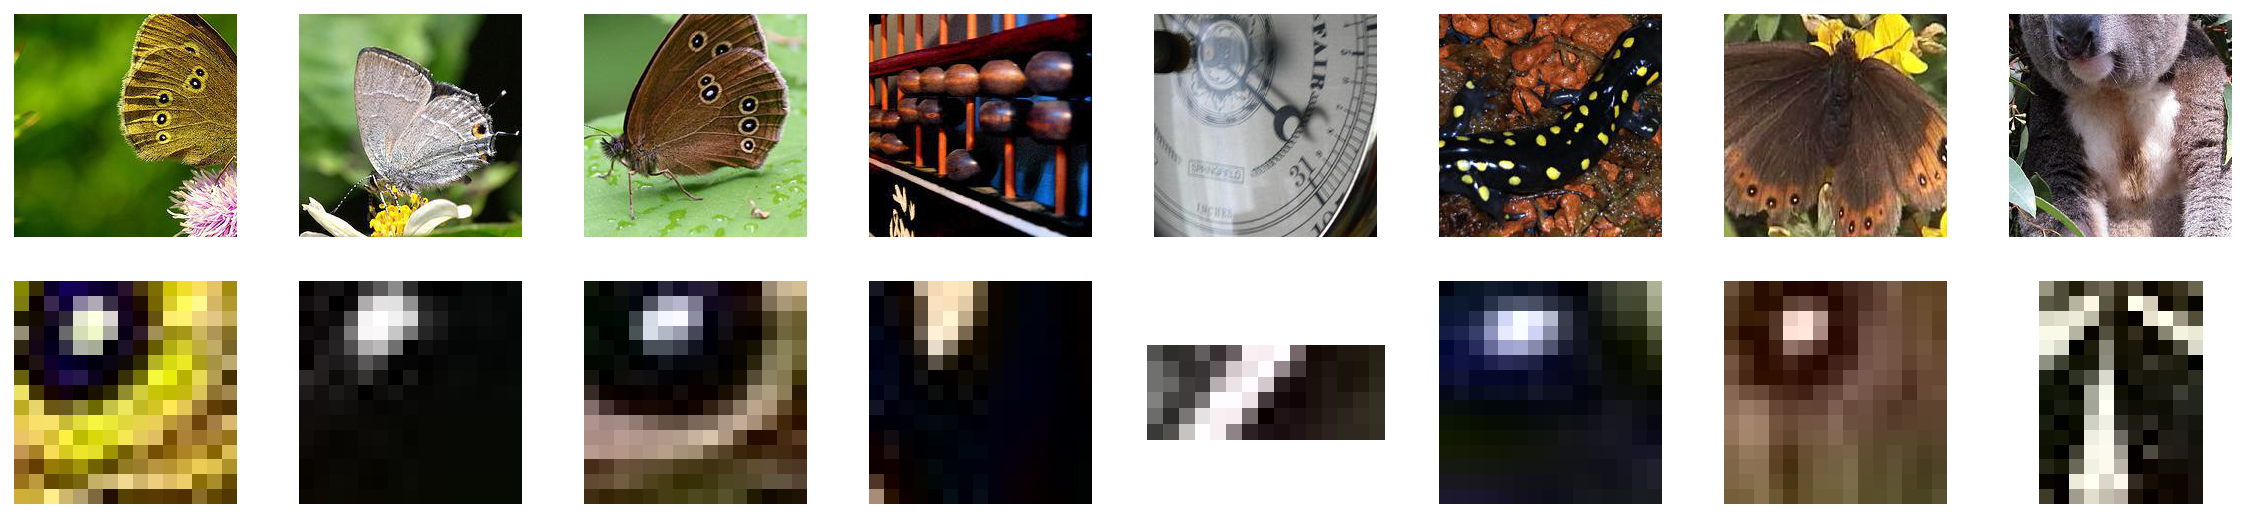

In [292]:
lurker.plot_crop(layer_indx=2,filt_indx=15)

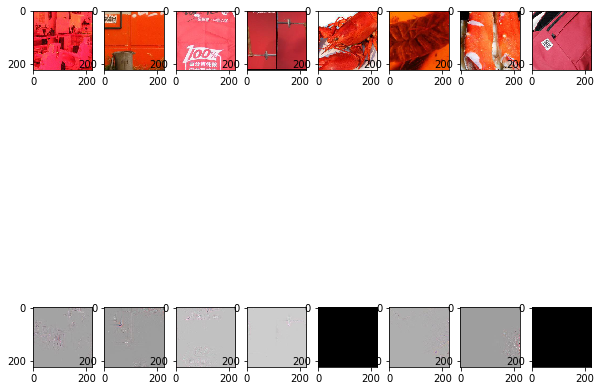

In [32]:
lurker.plot_top("avg",0,0,add_grad=True)

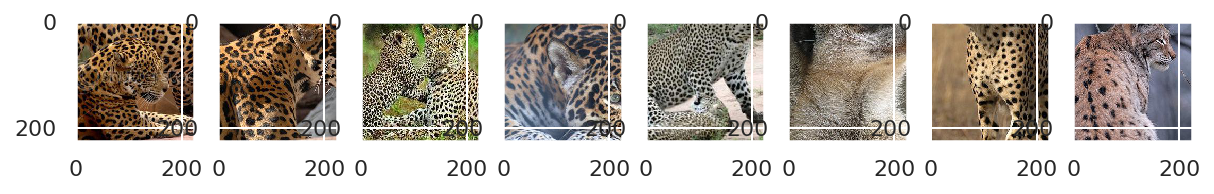

In [166]:
lurker.plot_top("avg",12,7)

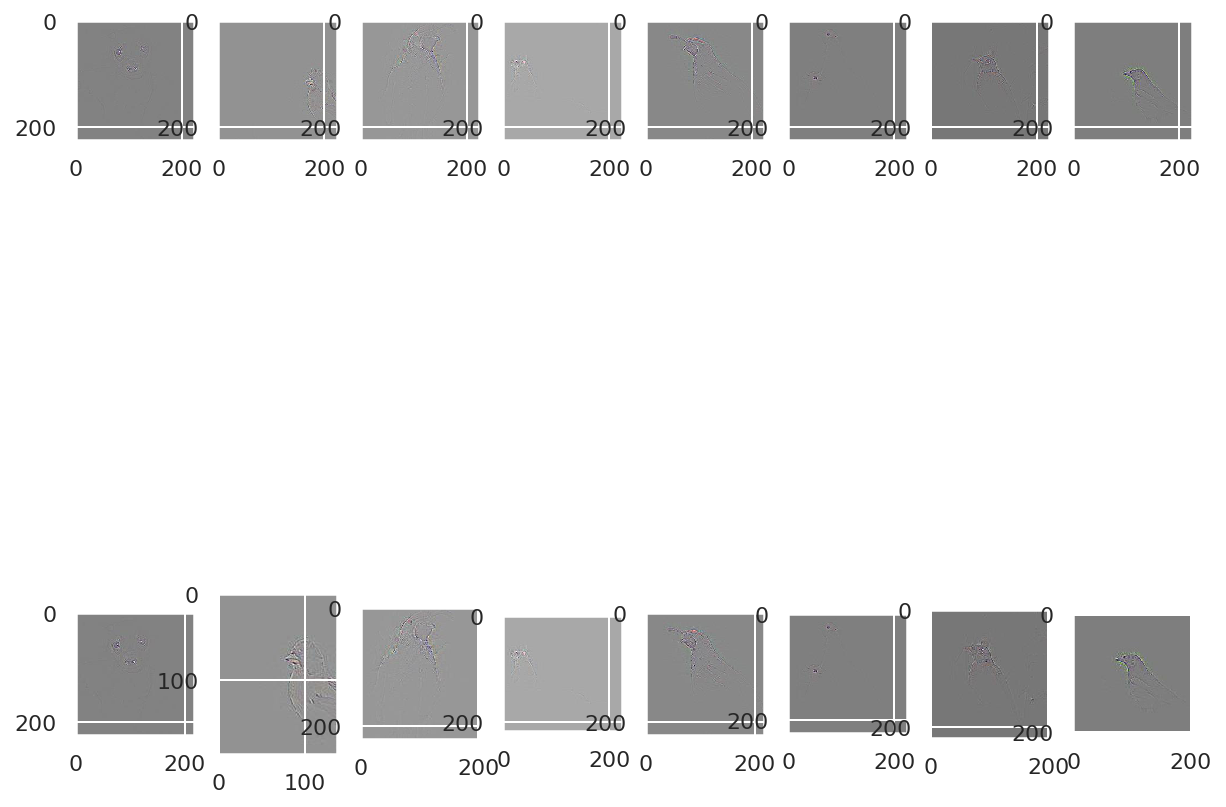

In [167]:
lurker.plot_crop(layer_indx=12,filt_indx=7,grad=True)

### Saving/Loading

In [46]:
lurker.conv_layinfos[0]

{'id': '0',
 'name': 'Conv2d_0',
 'n_input': 3,
 'n_output': 64,
 'filters': [{'id': 0,
   'avg_spikes': [1.5518499612808228,
    1.2829967737197876,
    1.2520158290863037,
    1.2023991346359253,
    1.1748952865600586,
    1.1489055156707764,
    1.143319010734558,
    1.137162685394287],
   'avg_imgs': ['results/vgg16_imagenet/avg_act/Conv2d_0/0/n02791270_12480.JPEG',
    'results/vgg16_imagenet/avg_act/Conv2d_0/0/n02747177_5043.JPEG',
    'results/vgg16_imagenet/avg_act/Conv2d_0/0/n02730930_7733.JPEG',
    'results/vgg16_imagenet/avg_act/Conv2d_0/0/n02790996_3850.JPEG',
    'results/vgg16_imagenet/avg_act/Conv2d_0/0/n01983481_2083.JPEG',
    'results/vgg16_imagenet/avg_act/Conv2d_0/0/n01990800_9258.JPEG',
    'results/vgg16_imagenet/avg_act/Conv2d_0/0/n01981276_4430.JPEG',
    'results/vgg16_imagenet/avg_act/Conv2d_0/0/n02769748_54716.JPEG'],
   'avg_imgs_grad': ['results/vgg16_imagenet/avg_act_grad/Conv2d_0/0/n02791270_12480_grad.jpg',
    'results/vgg16_imagenet/avg_act_grad/Con

How to save/load the lurker in a convenient manner..

In [8]:
lurker.save_to_dill("./generated/vgg16_imagenet.pickle")

dill saving done!


In [9]:
lurker = Lurk.load_from_dill("./generated/vgg16_imagenet.pickle")

Loading done!


If you wish to load a precomputed json, just add the `load_path` attribute. Watch out, it needs to be coherent with the folder name.

In [30]:
lurker2 = Lurk(model,
               preprocess,
               save_gen_imgs_dir='./results/trash/',
               save_json_path='./saved_model/new_vgg16.json',
               imgs_src_dir="./data/imagenet10classes/images",
               load_json_path='./saved_model/vgg16_imagenet.json',
               side_size=224)

Loading done!


## Debug

In [82]:
import sys
sys.path.insert(1,"torchlurk/lib/pytorch_cnn_visualizations/")
from cnn_layer_visualization import CNNLayerVisualization

from torchvision.transforms import ToTensor,ToPILImage


In [86]:
visualizer = CNNLayerVisualization(model.features, 
                                    selected_layer=3, 
                                    selected_filter=16,
                                  )
act_max_img = visualizer.visualise_layer_with_hooks()

recent


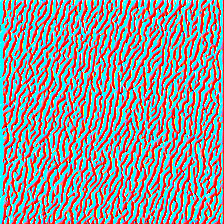

In [87]:
#old
ToPILImage()(act_max_img)

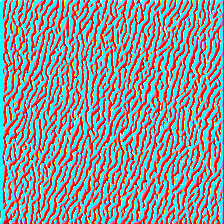

In [83]:
#old
ToPILImage()(act_max_img)

In [51]:
lurker.save_to_json()

json saving done!


In [50]:
for lay_info in lurker.conv_layinfos:
    for filt in lay_info['filters']:
        for agg in ["avg","max"]:
            for i,src_path in enumerate(filt["{}_imgs".format(agg)]):
                if (i > 0):
                    break
                print(type(src_path))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class